In [280]:
%load_ext autoreload
%autoreload 2
import numpy  as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
from utils import getphantom
from context import mvtomo
from mvtomo.algorithm_single import SIRT, MLEM, CGNE
from mvtomo.utils import volshow, plot_imgs

In [285]:
L = 64
n_angles=192
upscale = 2
mvtomo.set_backend("voxelproj", z_order=2)
phantom, sino_vox, angles = getphantom(L = L, upscale=upscale , n_angles=n_angles)
sino = mvtomo.add_poisson(sino_vox, 1000)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

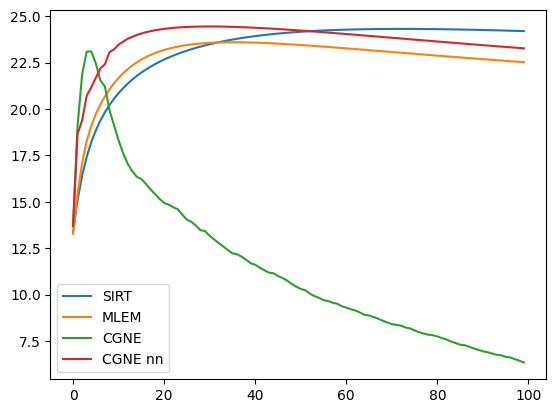

In [283]:
n_iters = 100
rec_sirt = SIRT(np.zeros(phantom.shape), sino, angles)
rec_mlem = MLEM(np.ones(phantom.shape), sino, angles)
rec_cgne = CGNE(np.zeros(phantom.shape), sino, angles)
rec_cgne_nn = CGNE(np.zeros(phantom.shape), sino, angles, nn_step=1)

vol_sirt, psnr_sirt = rec_sirt(n_iters,oracle = phantom)
vol_mlem, psnr_mlem = rec_mlem(n_iters,oracle = phantom)
vol_cgne, psnr_cgne = rec_cgne(n_iters,oracle = phantom)
vol_cgne2, psnr_cgne2 = rec_cgne_nn(n_iters,oracle = phantom)

plt.figure()
plt.plot(psnr_sirt, label = 'SIRT')
plt.plot(psnr_mlem, label = 'MLEM')
plt.plot(psnr_cgne, label = 'CGNE')
plt.plot(psnr_cgne2, label = 'CGNE nn')
plt.legend()

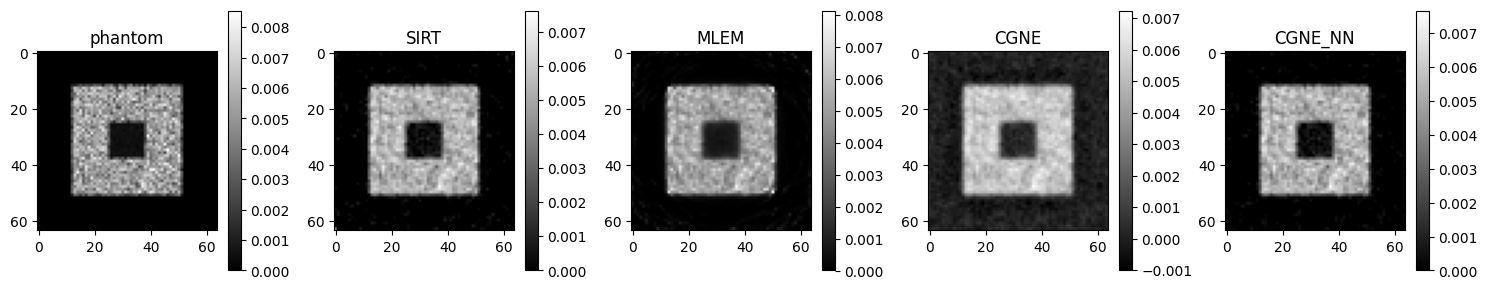

In [284]:
from mvtomo.utils import plot_imgs
plot_imgs(
    phantom=phantom[L//2],   
    SIRT=vol_sirt[L//2],
    MLEM=vol_mlem[L//2],
    CGNE=vol_cgne[L//2],
    CGNE_NN=vol_cgne2[L//2],    
)